In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [36]:
data = pd.read_csv(os.path.join("../data/", "train.csv"))
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [37]:
#посмотрим общую информацию
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [38]:
data.info() #типы данных
#выглядит так, что первые две колонки нам вряд ли понадобятся

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas



------------------------------ WELCOME TO EDA! ------------------------------
------------------------------ mmm... ------------------------------
------------------------------ your data is so delicious... ------------------------------

                    (
           (      )     )
             )   (    (
            (          `
        .-""^"""^""^"""^""-.
      (//\\//\\//\\//\\//\\//)
       ~\^^^^^^^^^^^^^^^^^^/~
         `================`
    
------------------------------ WELCOME TO EDA! ------------------------------


--------------------- Found 'Factor' columns --------------------- 
'mode' column
Counts of factors: 2
1 - count: 11459; frequency: 0.64
0 - count: 6537; frequency: 0.36

'time_signature' column
Counts of factors: 4
4 - count: 16451; frequency: 0.91
3 - count: 1228; frequency: 0.07
5 - count: 203; frequency: 0.01
1 - count: 114; frequency: 0.01

'mode' column
Counts of factors: 2
1 - count: 11459; frequency: 0.64
0 - count: 6537; frequency: 0.36

'time_si

Popularity count of ejection: 41
danceability count of ejection: 31
energy count of ejection: 0
key count of ejection: 0
loudness count of ejection: 818
speechiness count of ejection: 2034
acousticness count of ejection: 0
instrumentalness count of ejection: 2408
liveness count of ejection: 956
valence count of ejection: 0
tempo count of ejection: 36
duration_in min/ms count of ejection: 3245
Class count of ejection: 0
Popularity count of ejection: 41
danceability count of ejection: 31
energy count of ejection: 0
key count of ejection: 0
loudness count of ejection: 818
speechiness count of ejection: 2034
acousticness count of ejection: 0
instrumentalness count of ejection: 2408
liveness count of ejection: 956
valence count of ejection: 0
tempo count of ejection: 36
duration_in min/ms count of ejection: 3245
Class count of ejection: 0

--------------------- N/A Summary --------------------- 
Count of all N/A in DF: 6819
Count of rows that contain N/A: 6183
Column names that contain N/A:

/home/daria/ML/BI_ML_2024/HW4_Tree/code/my_awesome_eda.py:145: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_nas_plot.show()


       Popularity  danceability  energy   key  loudness  speechiness  \
0            60.0         0.854   0.564   1.0    -4.964       0.0485   
1            54.0         0.382   0.814   3.0    -7.230       0.0406   
2            35.0         0.434   0.614   6.0    -8.334       0.0525   
3            66.0         0.853   0.597  10.0    -6.528       0.0555   
4            53.0         0.167   0.975   2.0    -4.279       0.2160   
...           ...           ...     ...   ...       ...          ...   
17991        35.0         0.166   0.109   7.0   -17.100       0.0413   
17992        27.0         0.638   0.223  11.0   -10.174       0.0329   
17993        34.0         0.558   0.981   4.0    -4.683       0.0712   
17994        29.0         0.215   0.805   6.0   -12.757       0.1340   
17995        43.0         0.400   0.853   4.0    -5.320       0.0591   

       acousticness  instrumentalness  liveness  valence  ...   key  loudness  \
0          0.017100               NaN    0.0849   0.89

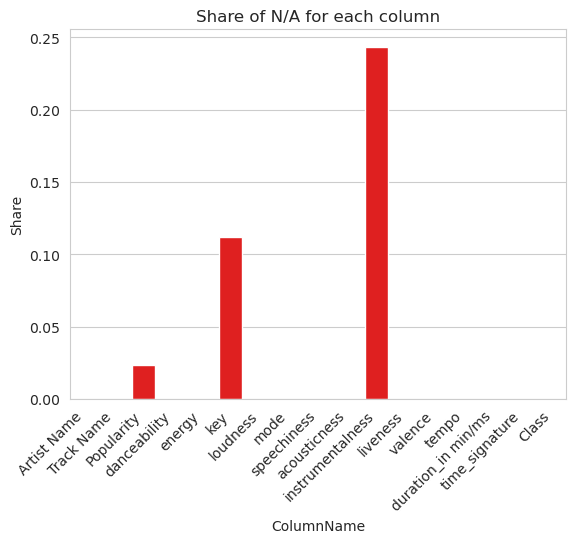

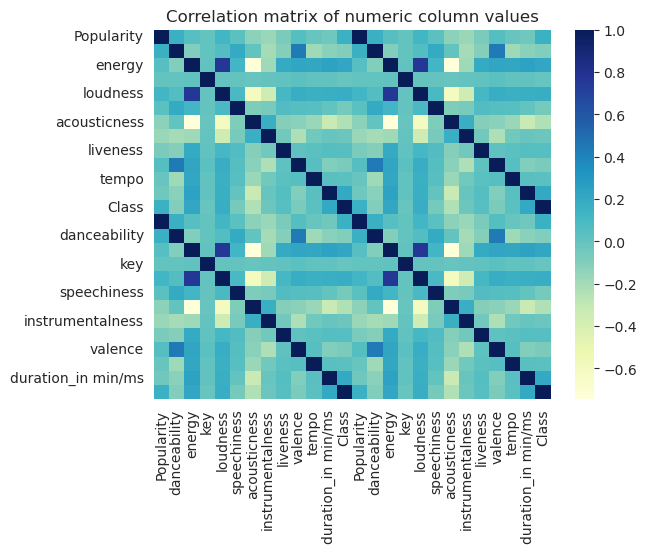

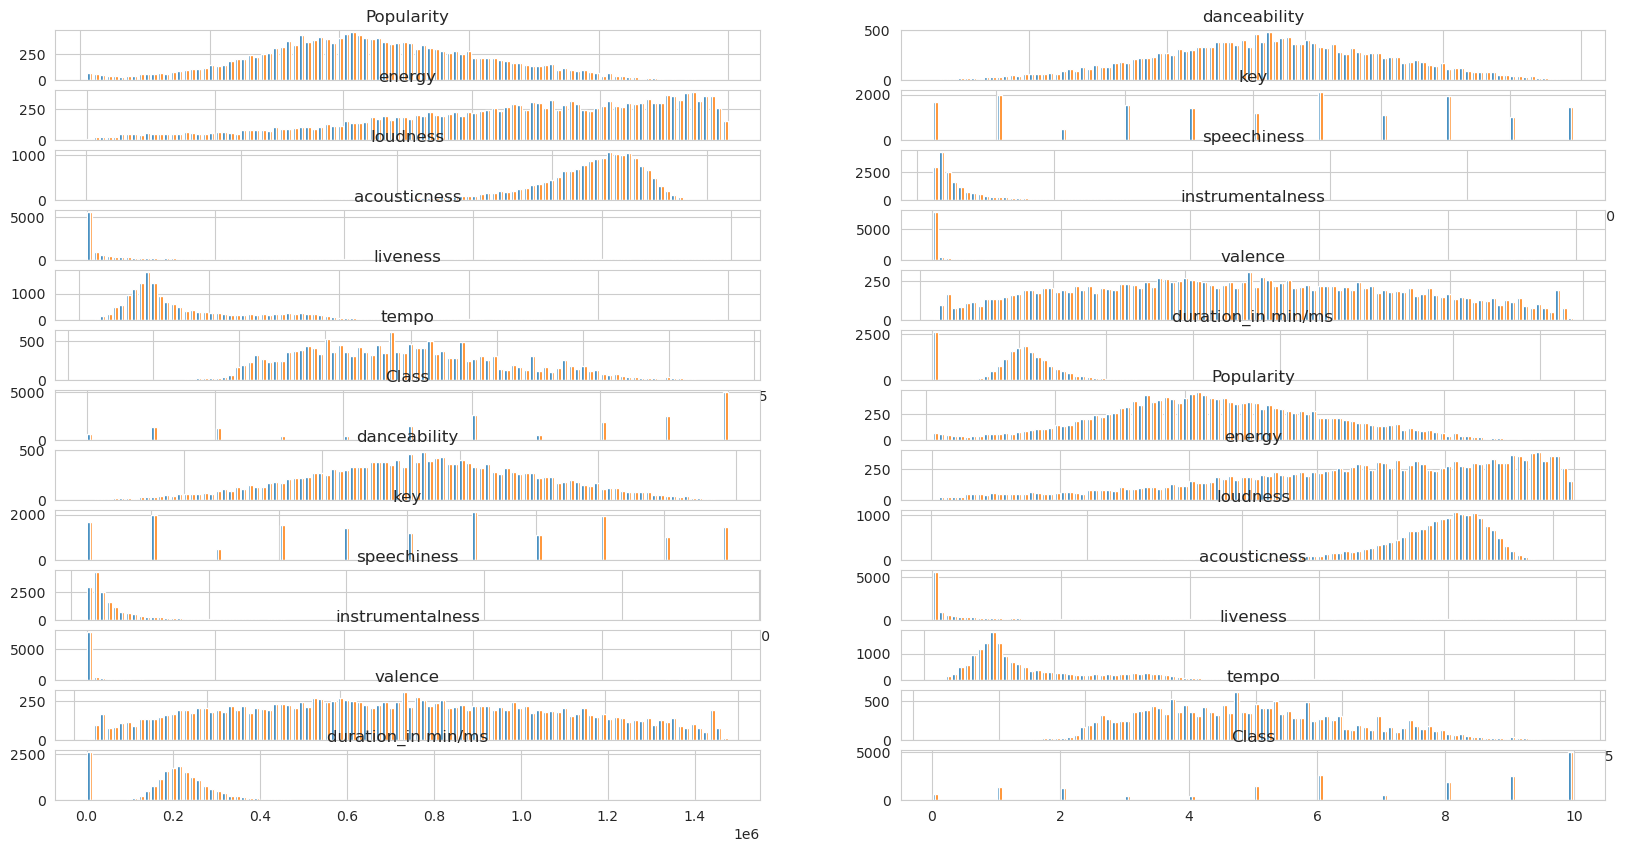

In [39]:
#запустим мой любимый скриптик и посмотрим, что он скажет
from my_awesome_eda import run_eda
run_eda(data)

In [40]:
data = data.dropna()


In [41]:
#выбросим колонки, которые не несут полезной информаци
data = data.drop(columns=['Artist Name','Track Name'])

In [42]:
data.head()


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


In [43]:
#Удалим максимальное значение в колонке duration
max_value = data['duration_in min/ms'].max()

<Axes: >

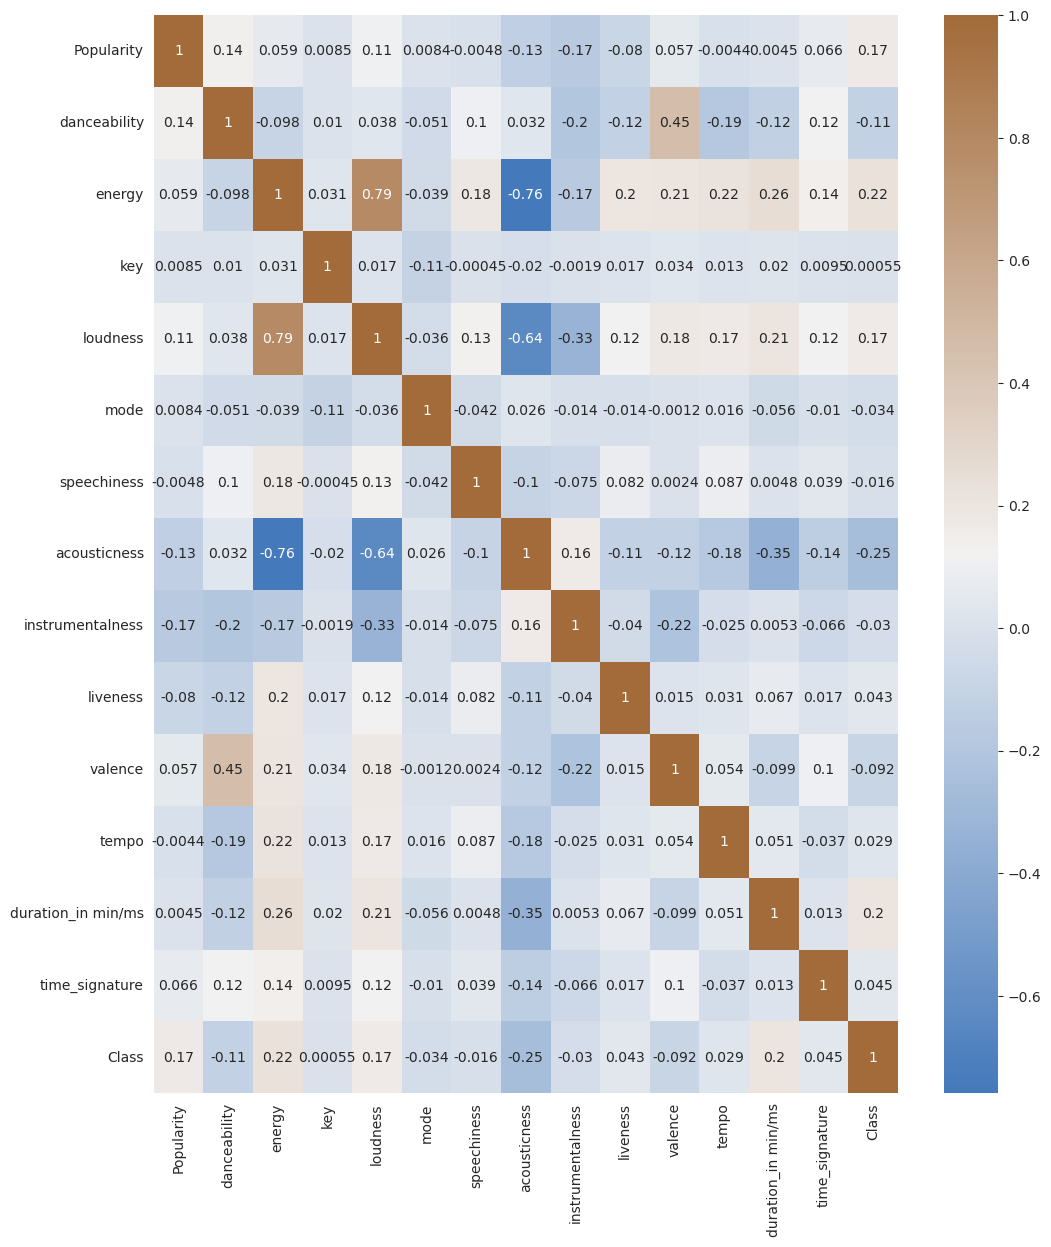

In [44]:
#построим конечную матрицу корреляции
corr = data.corr()
plt.pyplot.subplots(figsize=(12,14))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(250, 40, as_cmap=True))

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [45]:
#Разделим столбики на численные переменные и категоиальные, целевая - Class
num = ['Popularity', 
            'danceability', 
            'energy', 
            'loudness', 
            'speechiness', 
            'acousticness',
            'instrumentalness', 
            'liveness', 
            'valence', 
            'tempo',
            'duration_in min/ms',]

cat = ['key', 
       'mode', 
        'time_signature',]

target = ['Class']

In [46]:
#перекодируем категориальные величины
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[cat]) 

Разделим данные на train и test

In [47]:
X = data[cat + num]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Построим модель и найдем ее параметры

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_param_dt = {
    'max_depth': [None,4,5,6,7,8,9,10,20,30,40,50,70,90,120,150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': list(range(1,14,4)),
}

In [50]:
dt_model = DecisionTreeClassifier()

In [51]:
grid_search = GridSearchCV(dt_model, grid_param_dt, cv=5, n_jobs=4)

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                       50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 5, 9, 13],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

Посмотрим, какая модель здесь лучшая

In [53]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.4521680195986778


Обучим хорошенькую

In [54]:
good_dt = grid_search.best_estimator_
good_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=5)

In [55]:
predictions = good_dt.predict(X_test)

[Text(0.5, 0.875, 'duration_in min/ms <= 33061.443\ngini = 0.844\nsamples = 8269\nvalue = [264, 732, 673, 185, 107, 370, 1421, 313, 1059, 774\n2371]'),
 Text(0.25, 0.625, 'instrumentalness <= 0.539\ngini = 0.789\nsamples = 1038\nvalue = [264, 0, 0, 185, 107, 0, 0, 313, 0, 89, 80]'),
 Text(0.125, 0.375, 'valence <= 0.467\ngini = 0.785\nsamples = 731\nvalue = [245.0, 0.0, 0.0, 167.0, 107.0, 0.0, 0.0, 48.0, 0.0\n84.0, 80.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'energy <= 0.429\ngini = 0.247\nsamples = 307\nvalue = [19, 0, 0, 18, 0, 0, 0, 265, 0, 5, 0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'acousticness <= 0.001\ngini = 0.809\nsamples = 7231\nvalue = [0, 732, 673, 0, 0, 370, 1421, 0, 1059, 685, 2291]'),
 Text(0.625, 0.375, 'valence <= 0.263\ngini = 0.696\nsamples = 1842\nvalue = [0, 152, 29, 0, 0, 24, 225, 0, 728, 31, 653]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 

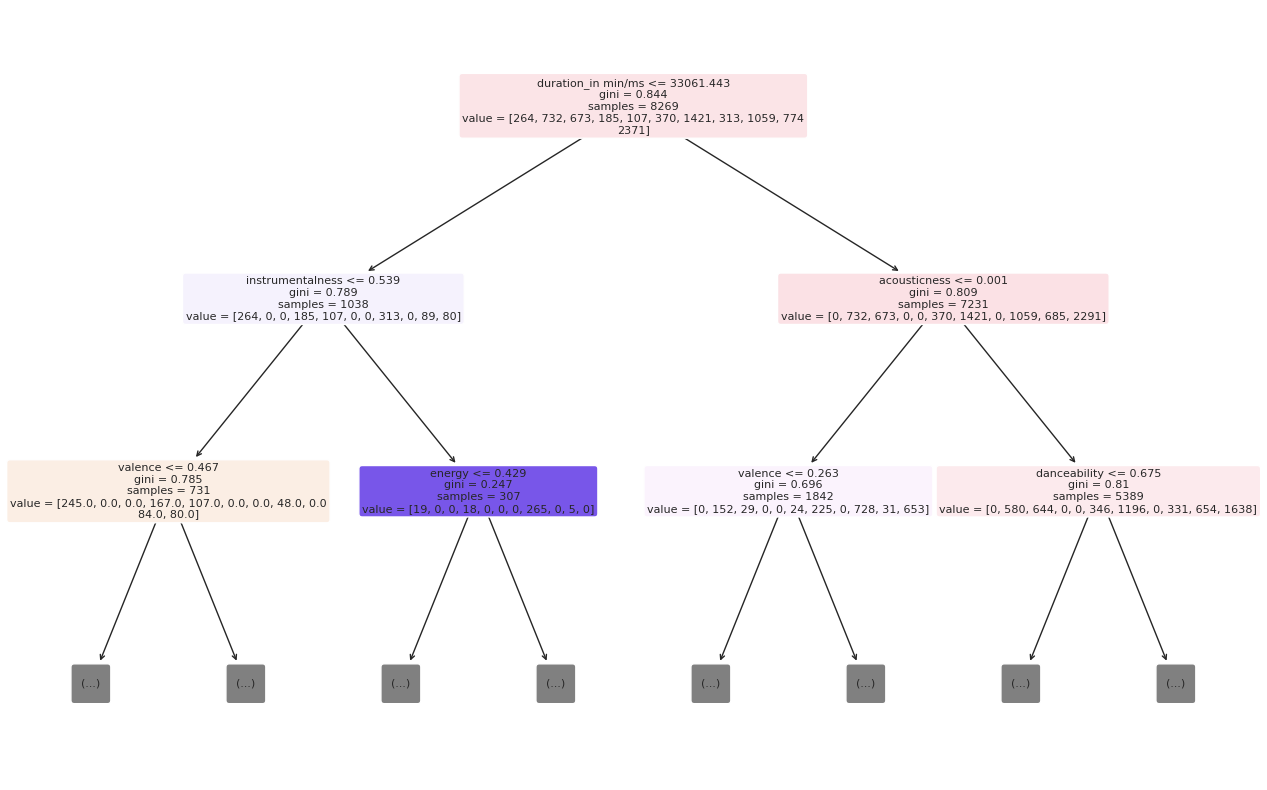

In [56]:
#Покажем первые два уровня разбиений
from sklearn.tree import plot_tree

plt.pyplot.figure(figsize=(16,10))
plot_tree(good_dt, 
          rounded=True, 
          max_depth=2, 
          filled=True, 
          fontsize=8, 
          feature_names=cat + num)

In [57]:
#Нарисуем confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[ 94   0   0   7   8   0   0   8   0   3   2]
 [  0   8  24   0   0   7  71   0  15  29 151]
 [  0   2 103   0   0   3  23   0   4  49  99]
 [ 25   0   0  48   2   0   0   4   0   6   0]
 [ 11   0   0   1  18   0   0   2   0   8   1]
 [  0   0   9   0   0  55  26   0   1  37  19]
 [  0   6  56   0   0  11 192   0  22  51 280]
 [ 13   0   0   6   0   0   0 132   0   0   0]
 [  0   2   0   0   0   1  23   0 231   3 204]
 [ 10   0  36   3   5  20  53   0   3 101  94]
 [  6   3  65   2   5   6 107   0  79  72 658]]


In [58]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.77      0.67       122
           1       0.38      0.03      0.05       305
           2       0.35      0.36      0.36       283
           3       0.72      0.56      0.63        85
           4       0.47      0.44      0.46        41
           5       0.53      0.37      0.44       147
           6       0.39      0.31      0.35       618
           7       0.90      0.87      0.89       151
           8       0.65      0.50      0.56       464
           9       0.28      0.31      0.30       325
          10       0.44      0.66      0.52      1003

    accuracy                           0.46      3544
   macro avg       0.52      0.47      0.47      3544
weighted avg       0.47      0.46      0.44      3544



In [59]:
print(accuracy_score(y_test, predictions))

0.46275395033860045


### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

Random Forest

In [74]:
params = {
    'n_estimators': [30, 50, 60, 70],
    'max_depth': [1, 2, 3, 5],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': [1,2,3],
    #'bootstrap': [True, False]
}

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [76]:
grid_search_rf = GridSearchCV(estimator=rf_model,
                     param_grid=params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=4)

In [77]:
grid_search_rf.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [30, 50, 60, 70]},
             scoring='accuracy')

In [78]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 70}
0.46849639839915846
RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=70)


### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1.

2.

3.

In [ ]:
1. Люблю Тома и Джерри (даже неудачные полные метры, даже когда они говорят)
2. Нравится творчество Квентина Тарантино, его внимание к мелочам и невероятные саундтреки;
3. Купила три постера по фильмам Назад в будущее, до сих пор не повесила в рамочки, потому что нет времени  их купить